In [1]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import math

In [2]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('IPO 수익여부 분석 최종데이터.csv', encoding = 'cp949')
del df['Unnamed: 0']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   기업명           539 non-null    object 
 1   공모가(원)        539 non-null    int64  
 2   기관청약경쟁률       539 non-null    float64
 3   일반청약경쟁률       539 non-null    float64
 4   상장주식수         539 non-null    int64  
 5   매출액(백만원)      539 non-null    int64  
 6   순이익(백만원)      539 non-null    int64  
 7   자본금(백만원)      539 non-null    int64  
 8   의무보유확약비율      539 non-null    float64
 9   구주매출비율        539 non-null    float64
 10  최대주주지분율       539 non-null    float64
 11  유통가능물량(비율)    539 non-null    float64
 12  공모금액(백만원)     539 non-null    int64  
 13  첫날손익률         539 non-null    float64
 14  최대희망공모가액차(%)  539 non-null    float64
 15  주간사규모         539 non-null    int64  
 16  유가증권여부        539 non-null    int64  
 17  상장분기          539 non-null    int64  
 18  종가            539 non-null    

In [123]:
df.describe()

,공모가(원),기관청약경쟁률,일반청약경쟁률,상장주식수,매출액(백만원),순이익(백만원),자본금(백만원),의무보유확약비율,구주매출비율,최대주주지분율,유통가능물량(비율),공모금액(백만원),첫날손익률,최대희망공모가액차(%),주간사규모,유가증권여부,상장분기
count,539.00000,539.00000,539.00000,539.00000,539.00000,539.00000,539.00000,539.00000,539.00000,539.00000,539.00000,539.00000,539.00000,539.00000,539.00000,539.00000,539.00000
mean,22368.66419,635.18083,686.39228,3262188.41002,132065.75325,9057.29128,14598.34137,13.15538,8.78573,45.10490,39.19668,91266.56586,37.82981,-5.83512,0.83673,0.11688,2.95176
std,31160.28570,567.78027,741.30897,5080936.03977,524710.35231,90672.19113,107620.78276,15.97820,16.88593,16.76223,13.60836,317731.83430,52.09662,16.12357,0.36995,0.32158,1.11824
min,1300.00000,3.66000,0.29000,250000.00000,0.00000,-431463.00000,0.00000,0.00000,0.00000,10.58000,9.90000,2475.00000,-36.96000,-56.25000,0.00000,0.00000,1.00000
25%,9950.00000,96.13500,51.27500,1067825.50000,13724.50000,128.50000,2527.50000,1.38500,0.00000,33.02500,28.60000,15115.00000,-3.16500,-13.39500,1.00000,0.00000,2.00000
50%,15000.00000,494.20000,568.00000,1784500.00000,34711.00000,3521.00000,3992.00000,7.53000,0.00000,43.34000,37.61000,26800.00000,22.68000,0.00000,1.00000,0.00000,3.00000
75%,25750.00000,1104.51500,1031.27000,3137025.00000,82893.50000,8056.50000,6680.50000,17.79000,11.47500,58.26000,48.77500,46009.50000,65.13000,0.00000,1.00000,0.00000,4.00000
max,498000.00000,2269.68000,6762.75000,65450000.00000,8310181.00000,1904946.00000,2375501.00000,81.15000,96.90000,100.00000,78.54000,4309807.00000,160.00000,33.33000,1.00000,1.00000,4.00000


In [124]:
big = df[df['유가증권여부'] == 1].reset_index()
small = df[df['유가증권여부'] == 0].reset_index()

In [125]:
del big['index']
del small['index']

In [126]:
del big['유가증권여부']
del small['유가증권여부']

In [127]:
big.describe()

,공모가(원),기관청약경쟁률,일반청약경쟁률,상장주식수,매출액(백만원),순이익(백만원),자본금(백만원),의무보유확약비율,구주매출비율,최대주주지분율,유통가능물량(비율),공모금액(백만원),첫날손익률,최대희망공모가액차(%),주간사규모,상장분기
count,63.00000,63.00000,63.00000,63.00000,63.00000,63.00000,63.00000,63.00000,63.00000,63.00000,63.00000,63.00000,63.00000,63.00000,63.00000,63.00000
mean,48664.28571,381.61556,206.46444,9905989.14286,664700.80952,56868.00000,84591.34921,20.17159,16.86984,56.34556,30.53333,490606.92063,27.45619,-9.14111,0.93651,3.04762
std,73108.30258,508.47806,245.13592,10510683.31014,1193060.47077,255571.01469,307179.27242,23.11387,25.10800,18.33301,11.80715,809923.46877,48.54079,13.45924,0.24580,1.08403
min,3500.00000,3.66000,0.29000,878181.00000,0.00000,-431463.00000,1313.00000,0.00000,0.00000,19.01000,9.90000,12600.00000,-24.17000,-42.13000,0.00000,1.00000
25%,13350.00000,45.86500,12.78500,3470000.00000,180150.00000,11165.00000,6125.50000,0.78500,0.00000,44.44000,22.63000,72000.00000,-8.13500,-13.81000,1.00000,3.00000
50%,28000.00000,149.83000,126.68000,5900000.00000,296488.00000,20675.00000,17811.00000,10.45000,0.00000,58.30000,27.96000,127723.00000,5.88000,0.00000,1.00000,3.00000
75%,52500.00000,437.73000,307.06500,13432100.00000,621551.00000,40475.00000,50879.50000,30.47000,32.78500,67.96500,32.86000,411654.50000,59.07000,0.00000,1.00000,4.00000
max,498000.00000,1882.88000,1147.76000,65450000.00000,8310181.00000,1904946.00000,2375501.00000,81.15000,92.86000,100.00000,65.40000,4309807.00000,160.00000,9.68000,1.00000,4.00000


In [128]:
small.describe()

,공모가(원),기관청약경쟁률,일반청약경쟁률,상장주식수,매출액(백만원),순이익(백만원),자본금(백만원),의무보유확약비율,구주매출비율,최대주주지분율,유통가능물량(비율),공모금액(백만원),첫날손익률,최대희망공모가액차(%),주간사규모,상장분기
count,476.00000,476.00000,476.00000,476.00000,476.00000,476.00000,476.00000,476.00000,476.00000,476.00000,476.00000,476.00000,476.00000,476.00000,476.00000,476.00000
mean,18888.36134,668.74095,749.91214,2382861.84244,61569.93697,2729.40336,5334.56092,12.22676,7.71578,43.61716,40.34330,38412.69538,39.20279,-5.39756,0.82353,2.93908
std,17270.09671,567.21041,761.57027,2861971.12689,288858.45979,21048.45962,8142.05881,14.56149,15.19382,15.98099,13.42687,69068.64707,52.44349,16.40619,0.38162,1.12318
min,1300.00000,3.77000,0.43000,250000.00000,0.00000,-84669.00000,0.00000,0.00000,0.00000,10.58000,10.93000,2475.00000,-36.96000,-56.25000,0.00000,1.00000
25%,9075.00000,114.13750,91.19750,1000000.00000,12598.75000,-598.75000,2425.00000,1.43500,0.00000,31.97000,29.75250,14425.25000,0.21000,-13.36250,1.00000,2.00000
50%,14450.00000,579.44000,662.26500,1600000.00000,31102.50000,3067.00000,3697.50000,7.34500,0.00000,41.48500,38.95500,24064.00000,24.90000,0.00000,1.00000,3.00000
75%,23625.00000,1123.81750,1104.38750,2500000.00000,60249.25000,5893.50000,5646.25000,15.99750,9.09000,55.85750,49.27000,38115.25000,65.38750,0.00000,1.00000,4.00000
max,190000.00000,2269.68000,6762.75000,24604000.00000,6196498.00000,371783.00000,136688.00000,74.30000,96.90000,100.00000,78.54000,1008764.00000,160.00000,33.33000,1.00000,4.00000


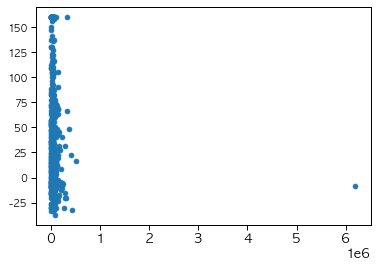

In [129]:
plt.scatter(small['매출액(백만원)'],small['첫날손익률'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8df132f6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8df132fdf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8df132f460>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8df133b580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8df133b910>],
 'means': []}

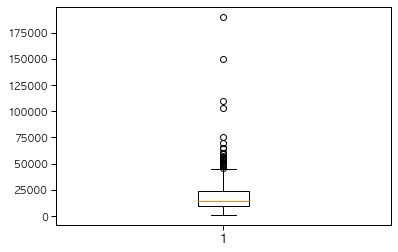

In [130]:
import matplotlib.pyplot as plt

plt.boxplot(x='공모가(원)',data=small)

In [131]:
small = small[small['매출액(백만원)'] != 0]
small

,기업명,공모가(원),기관청약경쟁률,일반청약경쟁률,상장주식수,매출액(백만원),순이익(백만원),자본금(백만원),의무보유확약비율,구주매출비율,최대주주지분율,유통가능물량(비율),공모금액(백만원),첫날손익률,최대희망공모가액차(%),주간사규모,상장분기,종가
0,아셈스,8000,1618.26000,2435.07000,2000000,34049,1052,4479,7.71000,0.00000,46.55000,39.75000,16000,68.75000,0.00000,1,1,"13,500"
1,레인보우로보틱스,10000,1489.90000,1201.26000,2650000,1694,-5497,7922,19.90000,0.00000,26.00000,37.06000,26500,160.00000,11.11000,1,1,"26,000"
2,마크로밀엠브레인,6800,1056.80000,888.01000,1400000,39075,1952,4484,19.39000,0.00000,42.22000,29.88000,9520,136.03000,6.25000,1,3,"16,050"
3,메탈라이프,13000,1288.21000,1397.97000,700000,19270,3742,1732,22.46000,0.00000,56.06000,20.79000,9100,160.00000,0.00000,1,4,"33,800"
4,연우,25200,317.00000,680.00000,2405680,168759,8670,6199,51.00000,0.00000,65.84000,31.04000,60623,45.04000,0.00000,1,4,"36,550"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,네오크레마,8000,96.60000,1.59000,1550000,21745,3562,3628,0.00000,0.00000,48.13000,34.27000,12400,4.62000,-30.43000,1,3,"8,370"
472,레이,20000,1013.19000,779.56000,1000000,47565,6779,2811,10.27000,0.00000,34.38000,39.25000,20000,23.75000,0.00000,1,3,"24,750"
473,핌스,19000,1210.28000,1161.84000,2000000,37783,5544,3632,4.39000,30.00000,37.99000,50.04000,38000,-3.68000,0.00000,0,3,"18,300"
474,와이엠티,21000,706.16000,841.57000,562627,49939,7742,1801,42.75000,11.13000,46.52000,37.69000,11815,47.86000,13.51000,1,2,"31,050"


In [132]:
pd.options.display.float_format = '{:.5f}'.format

In [133]:
small.describe()

,공모가(원),기관청약경쟁률,일반청약경쟁률,상장주식수,매출액(백만원),순이익(백만원),자본금(백만원),의무보유확약비율,구주매출비율,최대주주지분율,유통가능물량(비율),공모금액(백만원),첫날손익률,최대희망공모가액차(%),주간사규모,상장분기
count,467.00000,467.00000,467.00000,467.00000,467.00000,467.00000,467.00000,467.00000,467.00000,467.00000,467.00000,467.00000,467.00000,467.00000,467.00000,467.00000
mean,18651.30621,673.70600,755.58156,2398413.84154,62756.50964,3146.43683,5329.95717,12.27426,7.85109,43.98013,40.21043,38316.58030,39.62422,-5.22161,0.82441,2.93576
std,17196.48977,567.31492,764.33238,2886114.57301,291506.55520,20945.38732,8208.64805,14.68414,15.30574,15.90216,13.46335,69648.81347,52.68260,16.34212,0.38088,1.12718
min,1300.00000,3.77000,0.43000,250000.00000,29.00000,-84669.00000,0.00000,0.00000,0.00000,10.58000,10.93000,2475.00000,-36.96000,-56.25000,0.00000,1.00000
25%,9000.00000,119.02500,93.85000,1000000.00000,13100.50000,-31.00000,2415.50000,1.38500,0.00000,32.88500,29.71500,14199.50000,0.36500,-13.18500,1.00000,2.00000
50%,14000.00000,588.93000,663.03000,1600000.00000,31884.00000,3153.00000,3632.00000,7.17000,0.00000,42.03000,38.66000,23800.00000,25.22000,0.00000,1.00000,3.00000
75%,22650.00000,1123.89500,1106.24500,2500000.00000,60822.50000,6049.00000,5633.00000,16.43500,9.84500,56.03000,49.21500,37900.00000,65.52000,0.00000,1.00000,4.00000
max,190000.00000,2269.68000,6762.75000,24604000.00000,6196498.00000,371783.00000,136688.00000,74.30000,96.90000,100.00000,78.54000,1008764.00000,160.00000,33.33000,1.00000,4.00000


In [134]:
small = small[small['자본금(백만원)'] != 0]
small

,기업명,공모가(원),기관청약경쟁률,일반청약경쟁률,상장주식수,매출액(백만원),순이익(백만원),자본금(백만원),의무보유확약비율,구주매출비율,최대주주지분율,유통가능물량(비율),공모금액(백만원),첫날손익률,최대희망공모가액차(%),주간사규모,상장분기,종가
0,아셈스,8000,1618.26000,2435.07000,2000000,34049,1052,4479,7.71000,0.00000,46.55000,39.75000,16000,68.75000,0.00000,1,1,"13,500"
1,레인보우로보틱스,10000,1489.90000,1201.26000,2650000,1694,-5497,7922,19.90000,0.00000,26.00000,37.06000,26500,160.00000,11.11000,1,1,"26,000"
2,마크로밀엠브레인,6800,1056.80000,888.01000,1400000,39075,1952,4484,19.39000,0.00000,42.22000,29.88000,9520,136.03000,6.25000,1,3,"16,050"
3,메탈라이프,13000,1288.21000,1397.97000,700000,19270,3742,1732,22.46000,0.00000,56.06000,20.79000,9100,160.00000,0.00000,1,4,"33,800"
4,연우,25200,317.00000,680.00000,2405680,168759,8670,6199,51.00000,0.00000,65.84000,31.04000,60623,45.04000,0.00000,1,4,"36,550"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,네오크레마,8000,96.60000,1.59000,1550000,21745,3562,3628,0.00000,0.00000,48.13000,34.27000,12400,4.62000,-30.43000,1,3,"8,370"
472,레이,20000,1013.19000,779.56000,1000000,47565,6779,2811,10.27000,0.00000,34.38000,39.25000,20000,23.75000,0.00000,1,3,"24,750"
473,핌스,19000,1210.28000,1161.84000,2000000,37783,5544,3632,4.39000,30.00000,37.99000,50.04000,38000,-3.68000,0.00000,0,3,"18,300"
474,와이엠티,21000,706.16000,841.57000,562627,49939,7742,1801,42.75000,11.13000,46.52000,37.69000,11815,47.86000,13.51000,1,2,"31,050"


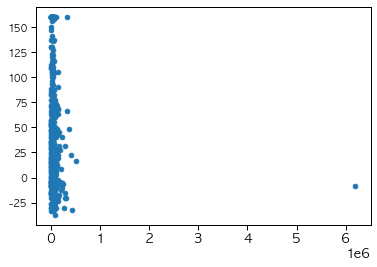

In [135]:
plt.scatter(small['매출액(백만원)'],small['첫날손익률'])
plt.show()

In [136]:
small[small['매출액(백만원)']> 1e+06]

,기업명,공모가(원),기관청약경쟁률,일반청약경쟁률,상장주식수,매출액(백만원),순이익(백만원),자본금(백만원),의무보유확약비율,구주매출비율,최대주주지분율,유통가능물량(비율),공모금액(백만원),첫날손익률,최대희망공모가액차(%),주간사규모,상장분기,종가
313,제일홀딩스,20700,113.98000,20.67000,20381000,6196498,371783,7071,2.88000,0.00000,66.50000,33.50000,421887,-7.97000,-8.81000,1,2,"19,050"


In [137]:
small = small.drop(313,axis=0)
small = small.reset_index()
small = small.drop('index',axis=1)
small

,기업명,공모가(원),기관청약경쟁률,일반청약경쟁률,상장주식수,매출액(백만원),순이익(백만원),자본금(백만원),의무보유확약비율,구주매출비율,최대주주지분율,유통가능물량(비율),공모금액(백만원),첫날손익률,최대희망공모가액차(%),주간사규모,상장분기,종가
0,아셈스,8000,1618.26000,2435.07000,2000000,34049,1052,4479,7.71000,0.00000,46.55000,39.75000,16000,68.75000,0.00000,1,1,"13,500"
1,레인보우로보틱스,10000,1489.90000,1201.26000,2650000,1694,-5497,7922,19.90000,0.00000,26.00000,37.06000,26500,160.00000,11.11000,1,1,"26,000"
2,마크로밀엠브레인,6800,1056.80000,888.01000,1400000,39075,1952,4484,19.39000,0.00000,42.22000,29.88000,9520,136.03000,6.25000,1,3,"16,050"
3,메탈라이프,13000,1288.21000,1397.97000,700000,19270,3742,1732,22.46000,0.00000,56.06000,20.79000,9100,160.00000,0.00000,1,4,"33,800"
4,연우,25200,317.00000,680.00000,2405680,168759,8670,6199,51.00000,0.00000,65.84000,31.04000,60623,45.04000,0.00000,1,4,"36,550"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,네오크레마,8000,96.60000,1.59000,1550000,21745,3562,3628,0.00000,0.00000,48.13000,34.27000,12400,4.62000,-30.43000,1,3,"8,370"
459,레이,20000,1013.19000,779.56000,1000000,47565,6779,2811,10.27000,0.00000,34.38000,39.25000,20000,23.75000,0.00000,1,3,"24,750"
460,핌스,19000,1210.28000,1161.84000,2000000,37783,5544,3632,4.39000,30.00000,37.99000,50.04000,38000,-3.68000,0.00000,0,3,"18,300"
461,와이엠티,21000,706.16000,841.57000,562627,49939,7742,1801,42.75000,11.13000,46.52000,37.69000,11815,47.86000,13.51000,1,2,"31,050"


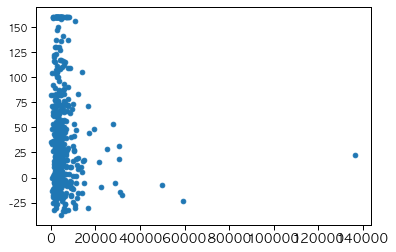

In [138]:
plt.scatter(small['자본금(백만원)'],small['첫날손익률'])
plt.show()

In [139]:
small[small['자본금(백만원)']> 120000]

,기업명,공모가(원),기관청약경쟁률,일반청약경쟁률,상장주식수,매출액(백만원),순이익(백만원),자본금(백만원),의무보유확약비율,구주매출비율,최대주주지분율,유통가능물량(비율),공모금액(백만원),첫날손익률,최대희망공모가액차(%),주간사규모,상장분기,종가
193,셀트리온헬스케어,41000,38.06000,6.95000,24604000,402389,28641,136688,12.50000,0.00000,36.82000,29.03000,1008764,22.68000,0.00000,1,3,50300


In [140]:
small = small.drop(193,axis=0)
small = small.reset_index()
small = small.drop('index',axis=1)
small

,기업명,공모가(원),기관청약경쟁률,일반청약경쟁률,상장주식수,매출액(백만원),순이익(백만원),자본금(백만원),의무보유확약비율,구주매출비율,최대주주지분율,유통가능물량(비율),공모금액(백만원),첫날손익률,최대희망공모가액차(%),주간사규모,상장분기,종가
0,아셈스,8000,1618.26000,2435.07000,2000000,34049,1052,4479,7.71000,0.00000,46.55000,39.75000,16000,68.75000,0.00000,1,1,"13,500"
1,레인보우로보틱스,10000,1489.90000,1201.26000,2650000,1694,-5497,7922,19.90000,0.00000,26.00000,37.06000,26500,160.00000,11.11000,1,1,"26,000"
2,마크로밀엠브레인,6800,1056.80000,888.01000,1400000,39075,1952,4484,19.39000,0.00000,42.22000,29.88000,9520,136.03000,6.25000,1,3,"16,050"
3,메탈라이프,13000,1288.21000,1397.97000,700000,19270,3742,1732,22.46000,0.00000,56.06000,20.79000,9100,160.00000,0.00000,1,4,"33,800"
4,연우,25200,317.00000,680.00000,2405680,168759,8670,6199,51.00000,0.00000,65.84000,31.04000,60623,45.04000,0.00000,1,4,"36,550"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,네오크레마,8000,96.60000,1.59000,1550000,21745,3562,3628,0.00000,0.00000,48.13000,34.27000,12400,4.62000,-30.43000,1,3,"8,370"
458,레이,20000,1013.19000,779.56000,1000000,47565,6779,2811,10.27000,0.00000,34.38000,39.25000,20000,23.75000,0.00000,1,3,"24,750"
459,핌스,19000,1210.28000,1161.84000,2000000,37783,5544,3632,4.39000,30.00000,37.99000,50.04000,38000,-3.68000,0.00000,0,3,"18,300"
460,와이엠티,21000,706.16000,841.57000,562627,49939,7742,1801,42.75000,11.13000,46.52000,37.69000,11815,47.86000,13.51000,1,2,"31,050"


In [141]:
small[small['첫날손익률']==0]

,기업명,공모가(원),기관청약경쟁률,일반청약경쟁률,상장주식수,매출액(백만원),순이익(백만원),자본금(백만원),의무보유확약비율,구주매출비율,최대주주지분율,유통가능물량(비율),공모금액(백만원),첫날손익률,최대희망공모가액차(%),주간사규모,상장분기,종가
278,공구우먼,20000,56.90000,7.53000,1400000,32683,4346,367,2.65000,0.00000,68.25000,30.56000,28000,0.00000,-35.48000,1,1,20000
427,케이피에스,14000,75.30000,452.96000,1079268,17547,2555,2135,0.00000,0.00000,39.04000,53.40000,15110,0.00000,-30.00000,1,3,"14,000"
434,제이엘케이인스펙션,9000,69.81000,8.49000,2000000,363,-6277,1489,0.00000,0.00000,25.81000,47.57000,18000,0.00000,-37.93000,1,4,"9,000"


#### 공모가와 종가가 같은 데이터는 제거함

In [142]:
small = small.drop([278,427,434],axis=0)
small = small.reset_index()
small = small.drop('index',axis=1)
small

,기업명,공모가(원),기관청약경쟁률,일반청약경쟁률,상장주식수,매출액(백만원),순이익(백만원),자본금(백만원),의무보유확약비율,구주매출비율,최대주주지분율,유통가능물량(비율),공모금액(백만원),첫날손익률,최대희망공모가액차(%),주간사규모,상장분기,종가
0,아셈스,8000,1618.26000,2435.07000,2000000,34049,1052,4479,7.71000,0.00000,46.55000,39.75000,16000,68.75000,0.00000,1,1,"13,500"
1,레인보우로보틱스,10000,1489.90000,1201.26000,2650000,1694,-5497,7922,19.90000,0.00000,26.00000,37.06000,26500,160.00000,11.11000,1,1,"26,000"
2,마크로밀엠브레인,6800,1056.80000,888.01000,1400000,39075,1952,4484,19.39000,0.00000,42.22000,29.88000,9520,136.03000,6.25000,1,3,"16,050"
3,메탈라이프,13000,1288.21000,1397.97000,700000,19270,3742,1732,22.46000,0.00000,56.06000,20.79000,9100,160.00000,0.00000,1,4,"33,800"
4,연우,25200,317.00000,680.00000,2405680,168759,8670,6199,51.00000,0.00000,65.84000,31.04000,60623,45.04000,0.00000,1,4,"36,550"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,네오크레마,8000,96.60000,1.59000,1550000,21745,3562,3628,0.00000,0.00000,48.13000,34.27000,12400,4.62000,-30.43000,1,3,"8,370"
455,레이,20000,1013.19000,779.56000,1000000,47565,6779,2811,10.27000,0.00000,34.38000,39.25000,20000,23.75000,0.00000,1,3,"24,750"
456,핌스,19000,1210.28000,1161.84000,2000000,37783,5544,3632,4.39000,30.00000,37.99000,50.04000,38000,-3.68000,0.00000,0,3,"18,300"
457,와이엠티,21000,706.16000,841.57000,562627,49939,7742,1801,42.75000,11.13000,46.52000,37.69000,11815,47.86000,13.51000,1,2,"31,050"


In [143]:
def ab(x):
    if x >= 0:
        return 1
    else:
        return 0

In [144]:
small['수익여부'] = small['첫날손익률'].apply(ab)
small

,기업명,공모가(원),기관청약경쟁률,일반청약경쟁률,상장주식수,매출액(백만원),순이익(백만원),자본금(백만원),의무보유확약비율,구주매출비율,최대주주지분율,유통가능물량(비율),공모금액(백만원),첫날손익률,최대희망공모가액차(%),주간사규모,상장분기,종가,수익여부
0,아셈스,8000,1618.26000,2435.07000,2000000,34049,1052,4479,7.71000,0.00000,46.55000,39.75000,16000,68.75000,0.00000,1,1,"13,500",1
1,레인보우로보틱스,10000,1489.90000,1201.26000,2650000,1694,-5497,7922,19.90000,0.00000,26.00000,37.06000,26500,160.00000,11.11000,1,1,"26,000",1
2,마크로밀엠브레인,6800,1056.80000,888.01000,1400000,39075,1952,4484,19.39000,0.00000,42.22000,29.88000,9520,136.03000,6.25000,1,3,"16,050",1
3,메탈라이프,13000,1288.21000,1397.97000,700000,19270,3742,1732,22.46000,0.00000,56.06000,20.79000,9100,160.00000,0.00000,1,4,"33,800",1
4,연우,25200,317.00000,680.00000,2405680,168759,8670,6199,51.00000,0.00000,65.84000,31.04000,60623,45.04000,0.00000,1,4,"36,550",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,네오크레마,8000,96.60000,1.59000,1550000,21745,3562,3628,0.00000,0.00000,48.13000,34.27000,12400,4.62000,-30.43000,1,3,"8,370",1
455,레이,20000,1013.19000,779.56000,1000000,47565,6779,2811,10.27000,0.00000,34.38000,39.25000,20000,23.75000,0.00000,1,3,"24,750",1
456,핌스,19000,1210.28000,1161.84000,2000000,37783,5544,3632,4.39000,30.00000,37.99000,50.04000,38000,-3.68000,0.00000,0,3,"18,300",0
457,와이엠티,21000,706.16000,841.57000,562627,49939,7742,1801,42.75000,11.13000,46.52000,37.69000,11815,47.86000,13.51000,1,2,"31,050",1


In [145]:
sns.set_context('paper', # notebook, talk, poster
                rc={'font.size':10, 
                    'xtick.labelsize':13, 
                    'ytick.labelsize':10, 
                    'axes.labelsize':17})

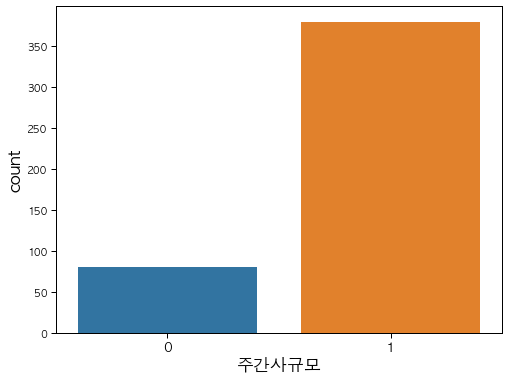

In [146]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.countplot(x='주간사규모',data=small)

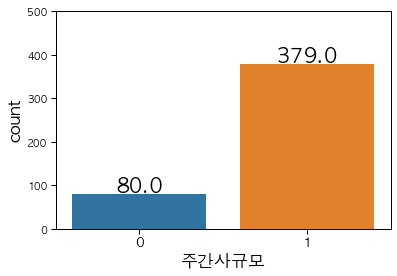

In [147]:
ax = sns.countplot(x='주간사규모',data=small)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 20)
ax.set_ylim(0, 500)
plt.show()

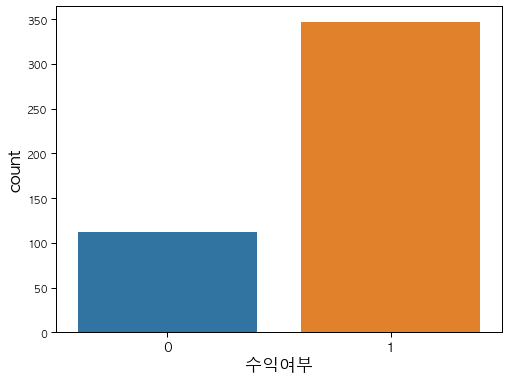

In [148]:
plt.figure(figsize=(8,6))
sns.countplot(x='수익여부',data=small)
plt.show()

In [149]:
small['수익여부'].value_counts()

1    347
0    112
Name: 수익여부, dtype: int64

In [150]:
small = pd.get_dummies(data=small,columns=['주간사규모','상장분기'],drop_first=True)
small

,기업명,공모가(원),기관청약경쟁률,일반청약경쟁률,상장주식수,매출액(백만원),순이익(백만원),자본금(백만원),의무보유확약비율,구주매출비율,...,유통가능물량(비율),공모금액(백만원),첫날손익률,최대희망공모가액차(%),종가,수익여부,주간사규모_1,상장분기_2,상장분기_3,상장분기_4
0,아셈스,8000,1618.26000,2435.07000,2000000,34049,1052,4479,7.71000,0.00000,...,39.75000,16000,68.75000,0.00000,"13,500",1,1,0,0,0
1,레인보우로보틱스,10000,1489.90000,1201.26000,2650000,1694,-5497,7922,19.90000,0.00000,...,37.06000,26500,160.00000,11.11000,"26,000",1,1,0,0,0
2,마크로밀엠브레인,6800,1056.80000,888.01000,1400000,39075,1952,4484,19.39000,0.00000,...,29.88000,9520,136.03000,6.25000,"16,050",1,1,0,1,0
3,메탈라이프,13000,1288.21000,1397.97000,700000,19270,3742,1732,22.46000,0.00000,...,20.79000,9100,160.00000,0.00000,"33,800",1,1,0,0,1
4,연우,25200,317.00000,680.00000,2405680,168759,8670,6199,51.00000,0.00000,...,31.04000,60623,45.04000,0.00000,"36,550",1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,네오크레마,8000,96.60000,1.59000,1550000,21745,3562,3628,0.00000,0.00000,...,34.27000,12400,4.62000,-30.43000,"8,370",1,1,0,1,0
455,레이,20000,1013.19000,779.56000,1000000,47565,6779,2811,10.27000,0.00000,...,39.25000,20000,23.75000,0.00000,"24,750",1,1,0,1,0
456,핌스,19000,1210.28000,1161.84000,2000000,37783,5544,3632,4.39000,30.00000,...,50.04000,38000,-3.68000,0.00000,"18,300",0,0,0,1,0
457,와이엠티,21000,706.16000,841.57000,562627,49939,7742,1801,42.75000,11.13000,...,37.69000,11815,47.86000,13.51000,"31,050",1,1,1,0,0


In [151]:
# small.to_csv('수익여부 최종 데이터.csv',index=False)

In [152]:
small['수익여부'].value_counts()

1    347
0    112
Name: 수익여부, dtype: int64

In [153]:
X = small.drop(['첫날손익률','기업명','수익여부','종가'],axis=1)
y = small[['수익여부']]

In [154]:
y

,수익여부
0,1
1,1
2,1
3,1
4,1
...,...
454,1
455,1
456,0
457,1


In [155]:
X1 = X.drop(['주간사규모_1','상장분기_2','상장분기_3','상장분기_4'],axis=1)
X1.corr()

,공모가(원),기관청약경쟁률,일반청약경쟁률,상장주식수,매출액(백만원),순이익(백만원),자본금(백만원),의무보유확약비율,구주매출비율,최대주주지분율,유통가능물량(비율),공모금액(백만원),최대희망공모가액차(%)
공모가(원),1.00000,0.00283,-0.10041,-0.17131,0.11295,0.08733,-0.13976,0.15786,0.10958,-0.00147,0.00126,0.45069,0.06770
기관청약경쟁률,0.00283,1.00000,0.74570,-0.03361,-0.01001,0.04279,-0.08364,0.33051,0.04767,0.05311,-0.28032,0.03128,0.65323
일반청약경쟁률,-0.10041,0.74570,1.00000,-0.09820,-0.12505,-0.03498,-0.12033,0.28502,0.00851,-0.00126,-0.22113,-0.13347,0.47632
상장주식수,-0.17131,-0.03361,-0.09820,1.00000,0.31780,0.19040,0.77760,-0.00050,0.20965,0.21168,-0.21814,0.42084,-0.07509
매출액(백만원),0.11295,-0.01001,-0.12505,0.31780,1.00000,0.49872,0.21160,0.01364,0.24425,0.31302,-0.18195,0.43719,-0.02424
순이익(백만원),0.08733,0.04279,-0.03498,0.19040,0.49872,1.00000,0.00818,0.08050,0.20973,0.34577,-0.17934,0.20142,0.08490
자본금(백만원),-0.13976,-0.08364,-0.12033,0.77760,0.21160,0.00818,1.00000,-0.04189,0.10360,0.12871,-0.11850,0.28904,-0.08232
의무보유확약비율,0.15786,0.33051,0.28502,-0.00050,0.01364,0.08050,-0.04189,1.00000,-0.05041,0.06422,-0.13901,0.14133,0.50251
구주매출비율,0.10958,0.04767,0.00851,0.20965,0.24425,0.20973,0.10360,-0.05041,1.00000,0.22781,-0.20859,0.15548,-0.01053
최대주주지분율,-0.00147,0.05311,-0.00126,0.21168,0.31302,0.34577,0.12871,0.06422,0.22781,1.00000,-0.61561,0.11130,0.07799


In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state=0,stratify=y)

In [157]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

In [158]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

X_train1 = X_train.drop(['주간사규모_1','상장분기_2','상장분기_3','상장분기_4'],axis=1)
X_train1 = X_train1.reset_index()
X_train2 = X_train[['주간사규모_1','상장분기_2','상장분기_3','상장분기_4']]
X_train2 = X_train2.reset_index()
X_train_mm = mm.fit_transform(X_train1)
X_test1 = X_test.drop(['주간사규모_1','상장분기_2','상장분기_3','상장분기_4'],axis=1)
X_test1 = X_test1.reset_index()
X_test2 = X_test[['주간사규모_1','상장분기_2','상장분기_3','상장분기_4']]
X_test2 = X_test2.reset_index()
X_test_mm = mm.transform(X_test1)

In [159]:
X_train_mm = pd.DataFrame(X_train_mm,columns=X_train1.columns)
X_train_mm = X_train_mm.drop('index',axis=1).reset_index()
X_test_mm = pd.DataFrame(X_test_mm,columns=X_test1.columns)
X_test_mm = X_test_mm.drop('index',axis=1).reset_index()
X_train_mm = pd.concat([X_train_mm,X_train2],axis=1)
X_test_mm = pd.concat([X_test_mm,X_test2],axis=1)
X_train_mm = X_train_mm.drop('index',axis=1)
X_test_mm = X_test_mm.drop('index',axis=1)

In [160]:
y_train = y_train.reset_index()
y_test = y_test.reset_index()

In [161]:
y_train.drop('index',axis=1,inplace=True)
y_test.drop('index',axis=1,inplace=True)

In [162]:
y_train

,수익여부
0,0
1,0
2,1
3,1
4,1
...,...
270,1
271,0
272,1
273,1


In [163]:
y_train.value_counts()

수익여부
1       208
0        67
dtype: int64

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [165]:
param_rf = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }
param_xgb = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}
param_gbr = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20],
            'learning_rate' : [0.05,0.1,0.2]
            }

In [166]:
rf = GridSearchCV(RandomForestClassifier(random_state=0),param_grid=param_rf,cv=3,scoring='f1_macro')
rf.fit(X_train_mm,y_train)
rf_pred = rf.predict(X_test_mm)
print(rf.best_params_)

{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 10}


In [167]:
rf.cv_results_

{'mean_fit_time': array([0.0153203 , 0.07665253, 0.00928338, 0.0784049 , 0.00884962,
        0.0747153 , 0.00920558, 0.08939759, 0.00905442, 0.07241893,
        0.00861231, 0.07238531, 0.0088497 , 0.07292215, 0.00909368,
        0.07427963, 0.00889937, 0.07196045, 0.00878763, 0.07410971,
        0.00922831, 0.07514564, 0.00895572, 0.07437929, 0.00894856,
        0.07419856, 0.00874289, 0.07311145, 0.0089968 , 0.07345239,
        0.0086906 , 0.07172672, 0.0087084 , 0.072047  , 0.00872938,
        0.07239739, 0.00904377, 0.07432644, 0.00899601, 0.07532668,
        0.00904568, 0.07403723, 0.00881346, 0.0729661 , 0.00873804,
        0.07236743, 0.00876435, 0.07245962, 0.00860413, 0.07279762,
        0.00883492, 0.07083742, 0.00856988, 0.07142758, 0.00892568,
        0.07394528, 0.0089016 , 0.07391914, 0.00923363, 0.07449142,
        0.01013597, 0.0781757 , 0.00888165, 0.07342728, 0.00936103,
        0.07442856, 0.00863258, 0.07224337, 0.00890533, 0.07218067,
        0.01054422, 0.07186667]

In [168]:
rf = RandomForestClassifier(max_depth=6,min_samples_leaf=8,min_samples_split=20,n_estimators=10,random_state=0)
rf.fit(X_train_mm,y_train)
rf_pred = rf.predict(X_test_mm)

In [169]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
test_cm = confusion_matrix(y_test,rf_pred)
test_acc = accuracy_score(y_test,rf_pred)
test_prc = precision_score(y_test,rf_pred)
test_rcll = recall_score(y_test,rf_pred)
test_f1 = f1_score(y_test,rf_pred)
test_roc = roc_auc_score(y_test,rf_pred)
test_cm,test_acc,test_prc,test_rcll,test_f1,test_roc

(array([[ 23,  22],
        [ 15, 124]]),
 0.7989130434782609,
 0.8493150684931506,
 0.8920863309352518,
 0.8701754385964912,
 0.7015987210231814)

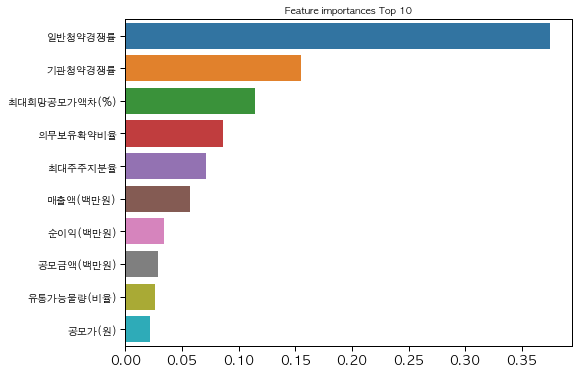

In [170]:
importances_values = rf.feature_importances_
importances = pd.Series(importances_values, index=X_train_mm.columns)
top20 = importances.sort_values(ascending=False)[:10]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 10')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [171]:
xgb = GridSearchCV(XGBClassifier(),param_grid=param_xgb,cv=3,scoring='recall')
xgb.fit(X_train_mm,y_train)
xgb_pred = xgb.predict(X_test_mm)
print(xgb.best_params_)

{'colsample_bytree': 0.75, 'max_depth': 5, 'min_child_weight': 3}


In [172]:
xgb = XGBClassifier(colsample_bytree=0.75,max_depth=5, min_child_weight=3,random_state=0)
xgb.fit(X_train_mm,y_train)
xgb_pred = xgb.predict(X_test_mm)

In [173]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
test_cm = confusion_matrix(y_test,xgb_pred)
test_acc = accuracy_score(y_test,xgb_pred)
test_prc = precision_score(y_test,xgb_pred)
test_rcll = recall_score(y_test,xgb_pred)
test_f1 = f1_score(y_test,xgb_pred)
test_roc = roc_auc_score(y_test,xgb_pred)
test_cm,test_acc,test_prc,test_rcll,test_f1,test_roc

(array([[ 27,  18],
        [ 16, 123]]),
 0.8152173913043478,
 0.8723404255319149,
 0.8848920863309353,
 0.8785714285714286,
 0.7424460431654676)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

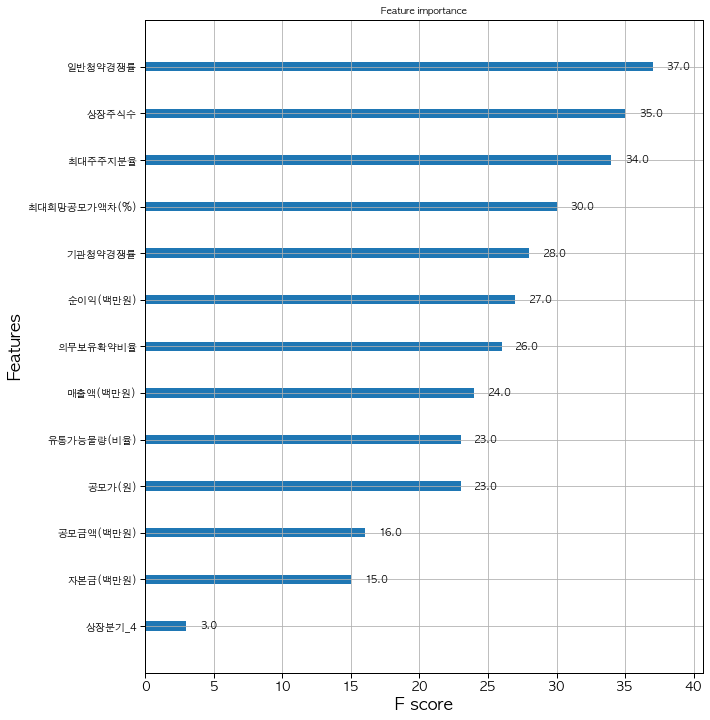

In [174]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb, ax=ax)

In [175]:
gbr = GridSearchCV(GradientBoostingClassifier(random_state=0),param_grid=param_gbr,cv=3,scoring='recall')
gbr.fit(X_train_mm,y_train)
gbr_pred = gbr.predict(X_test_mm)
print(gbr.best_params_)

{'learning_rate': 0.05, 'max_depth': 6, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 10}


In [176]:
gbr = GradientBoostingClassifier(max_depth=6,min_samples_leaf=18,min_samples_split=8,n_estimators=10,learning_rate = 0.05, random_state=0)
gbr.fit(X_train_mm,y_train)
gbr_pred = gbr.predict(X_test_mm)

In [177]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
test_cm = confusion_matrix(y_test,gbr_pred)
test_acc = accuracy_score(y_test,gbr_pred)
test_prc = precision_score(y_test,gbr_pred)
test_rcll = recall_score(y_test,gbr_pred)
test_f1 = f1_score(y_test,gbr_pred)
test_roc = roc_auc_score(y_test,gbr_pred)
test_cm,test_acc,test_prc,test_rcll,test_f1,test_roc

(array([[  7,  38],
        [  0, 139]]),
 0.7934782608695652,
 0.7853107344632768,
 1.0,
 0.879746835443038,
 0.5777777777777777)

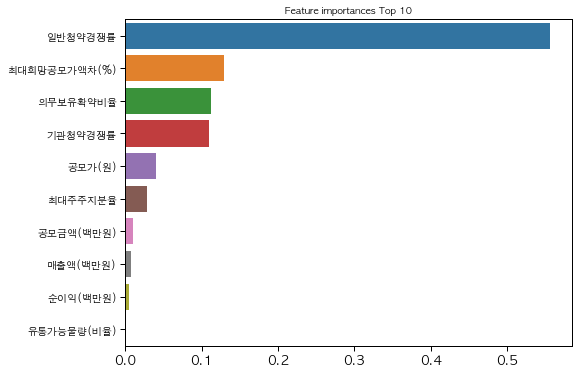

In [178]:
importances_values = gbr.feature_importances_
importances = pd.Series(importances_values, index=X_train_mm.columns)
top20 = importances.sort_values(ascending=False)[:10]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 10')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [179]:
y_test.value_counts()

수익여부
1       139
0        45
dtype: int64